In [1]:
import sys, platform, os
import numpy as np
import camb
import pandas as pd
import healpy as hp
from camb import model, initialpower
import useful_functions as uf
import pysm3
from fgbuster import (CMB, Dust, Synchrotron, basic_comp_sep,get_observation, get_instrument, get_sky)
from fgbuster.visualization import corner_norm
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = 12, 16

nside_patch = 16
nside=16
nside_compsep=nside_patch

seed_test=70
np.random.seed(seed_test)
#n_freq=len(sensitivities)
n_pix=hp.nside2npix(nside)

instrument = get_instrument('LiteBIRD')
kind_of_map='d0s0'
cmb='c1'
n_maps=10
pol=2

#sky_vary = get_sky(NSIDE_PATCH, kind_of_map)
sky_vary = get_sky(nside, kind_of_map)
cmb_sky=get_sky(nside, cmb)

'''for spectral_param in [sky_vary.components[0].mbb_index,
                       sky_vary.components[0].mbb_temperature,
                       sky_vary.components[1].pl_index]:
    spectral_param[:] = hp.ud_grade(hp.ud_grade(spectral_param.value, nside_patch),
                                    nside) * spectral_param.unit
    print(spectral_param.unit)'''

unit=-3 #uk->mk 
foreground_maps=np.zeros((n_maps,15,3,n_pix))
cmb_freq = get_observation(instrument, cmb_sky, noise=False, nside=nside,unit='mK_CMB')
for i in range(n_maps):
    sync_freq_maps = get_observation(instrument, sky_vary, noise=True, nside=nside,unit='mK_CMB') #, unit='uK_CMB')
    foreground_maps[i] = sync_freq_maps[:]+cmb_freq
#print(cmb_freq)

/home/amorelli/fgbuster/fgbuster/observation_helpers.py:97: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  return df.dropna(1, 'all')


In [2]:
#print(sync_freq_maps.shape)
#print(cmb_freq.shape)

In [3]:
components = [CMB(), Dust(150.), Synchrotron(20.)]
result=np.zeros((n_maps,n_pix,2))
for i in range(n_maps):
    compsep_tot=basic_comp_sep(components, instrument, foreground_maps[i,:,:],nside=nside_compsep) #nside=0 is default
    compsep=compsep_tot.s[0]
    print(compsep.shape)
    for p in range(pol):
        result[i,:,p]=compsep[p+1]-cmb_freq[0,p+1,:]

(3, 3072)
(3, 3072)
(3, 3072)
(3, 3072)
(3, 3072)
(3, 3072)
(3, 3072)
(3, 3072)
(3, 3072)
(3, 3072)


In [4]:
result*=10**-unit
res=hp.nside2resol(nside, arcmin=True)
mean_Q=np.mean(result[0,:,0])
std_Q=np.std(result[0,:,0])
sensitivity_Q=std_Q*res
print(mean_Q,std_Q,sensitivity_Q)
mean_U=np.mean(result[0,:,1])
std_U=np.std(result[0,:,1])
sensitivity_U=std_U*res
print(mean_U,std_U,sensitivity_U)

-0.00029718594957879276 0.015490771654284419 3.405973473719063
9.926120201983895e-05 0.014330296052643238 3.150818391435293


In [5]:
mean_map_Q=np.zeros(n_pix)
sigma_map_Q=np.zeros(n_pix)
mean_map_U=np.zeros(n_pix)
sigma_map_U=np.zeros(n_pix)
for i in range(n_pix):
    mean_map_Q[i]=np.mean(result[:,i,0])
    sigma_map_Q[i]=np.std(result[:,i,0])
    mean_map_U[i]=np.mean(result[:,i,1])
    sigma_map_U[i]=np.std(result[:,i,1])

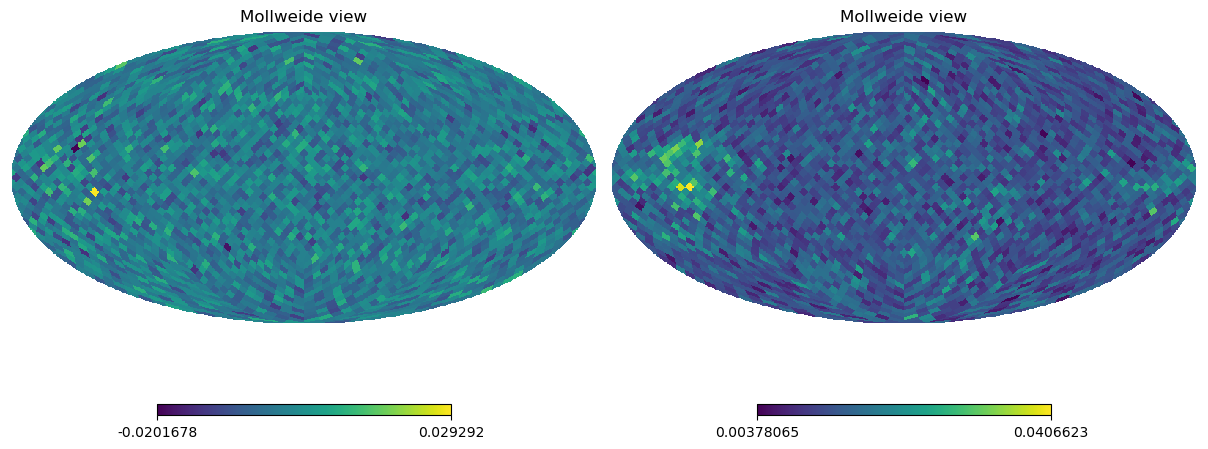

In [6]:
hp.mollview(mean_map_Q,sub=(1,2,1))#,min=-0.01,max=0.01)
hp.mollview(sigma_map_Q,sub=(1,2,2))#,min=0.02,max=0.03)

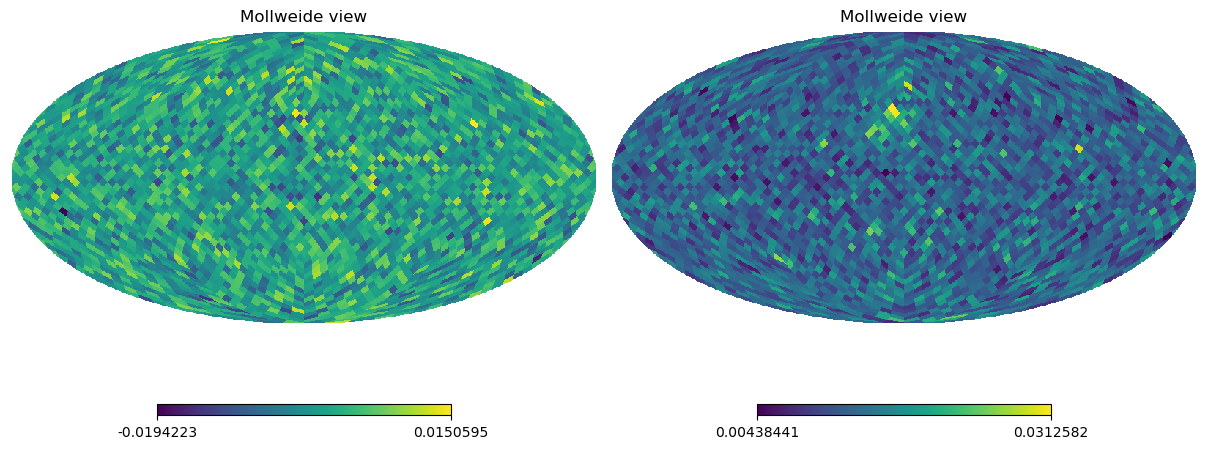

In [7]:
hp.mollview(mean_map_U,sub=(1,2,1))#,min=-0.01,max=0.01)
hp.mollview(sigma_map_U,sub=(1,2,2))#,min=0.02,max=0.03)